In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [25]:
(X_train, _), (X_test, _) = mnist.load_data()

In [49]:
X_test.shape

(10000, 784)

In [27]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

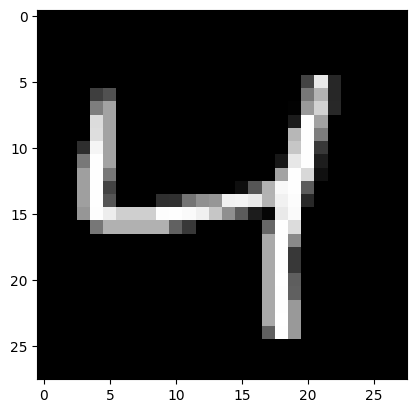

In [28]:
plt.imshow(X_train[2], cmap='gray')
plt.show()

In [29]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [30]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [31]:
x_train_noisy = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape )
x_test_noisy = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape )

In [32]:
x_train_noise = np.clip(x_train_noisy,0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy,0.0, 1.0)

In [ ]:
inputs = Input(shape=(784,))
encoder = Dense(32,activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noise, X_train, epochs=100, batch_size=256, shuffle=True,
                validation_data=(x_test_noisy,X_test))

In [46]:
idx = np.random.randint(X_test.shape[0])
original_image = X_test[idx]

noisy_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape )
noisy_image = np.clip(noisy_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0)) 

denoised_image = denoised_image.reshape((28,28))

1/1 [==============================] - 0s 29ms/step


(-0.5, 27.5, 27.5, -0.5)

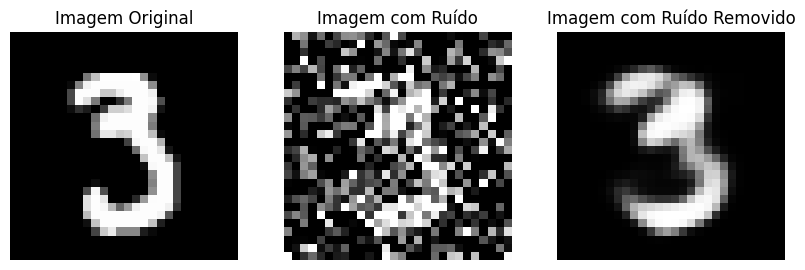

In [47]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(original_image.reshape(28,28), cmap='gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape(28,28), cmap='gray')
plt.title("Imagem com Ruído")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised_image, cmap='gray')
plt.title("Imagem com Ruído Removido")
plt.axis("off")